<a href="https://colab.research.google.com/github/srinijasriram/2216166_AIML_BootCamp_2023/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")


In [ ]:
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

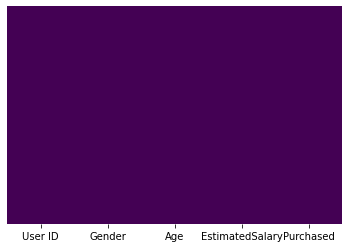

In [ ]:
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)

<function matplotlib.pyplot.show(close=None, block=None)>

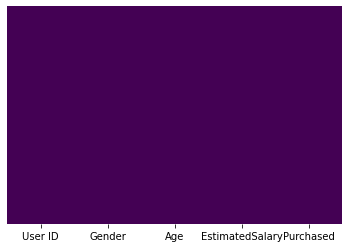

In [ ]:
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)


**data preprocessing**

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


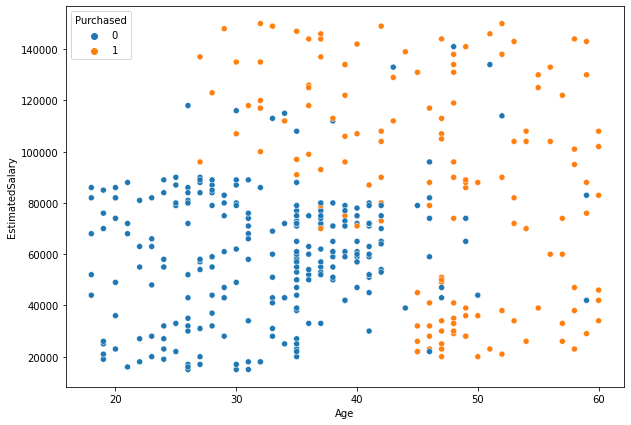

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)

plot_vs(df,'Age','EstimatedSalary','Purchased')

In [ ]:
df=df.drop(['User ID','Gender'],axis=1)

In [ ]:
print(df)


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

'''
method 2
x=np.array(df[['age','EstimatedSalary ']])
y=np.array(df[['Purchased']])
'''

"\nmethod 2\nx=np.array(df[['age','EstimatedSalary ']])\ny=np.array(df[['Purchased']])\n"

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
X_train


In [ ]:
X_test

In [ ]:
Y_train

In [ ]:
Y_test

**NORMALIZATION**


In [ ]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [ ]:
print(X_train)

**MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

**TRAINING**


In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
model.score(sst.transform(x),y)

0.8425

In [ ]:
model.score(X_train,Y_train)

0.8321428571428572

In [ ]:
model.score(X_test,Y_test)

0.8666666666666667